<a href="https://colab.research.google.com/github/hxchoongh/Machine_Learning/blob/main/email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identifying spam e-mails with machine learning**

A common use for binary classification is sorting spam e-mails from legitimate e-mails. Machine-learning models that classify e-mails as spam or not spam typically use the Naive Bayes learning algorithm because it has proven to be effective at identifying spam, even with relatively small training sets. Let's build a Naive Bayes classification model and train it with 1,000 e-mails labeled with 0s (for not spam) and 1s (for spam) and compare it with logistic regression and decide which model is more effective in identifying spam.


**Import necessary libraries**

In [ ]:
pip install nltk

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

**Upload data ham-spam.csv**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ham-spam.csv to ham-spam.csv


In [ ]:
# https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

import pandas as pd
import codecs

with codecs.open('ham-spam.csv', 'r', encoding='ISO-8859-1') as f:
    df = pd.read_csv(f)

**Data Exploration**

In [ ]:
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [ ]:
# Information of train data (notice that some dates are missing, class is in integer)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IsSpam  1000 non-null   int64 
 1   Text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Check for missing values (no missing values)
df.isnull().sum()

IsSpam    0
Text      0
dtype: int64

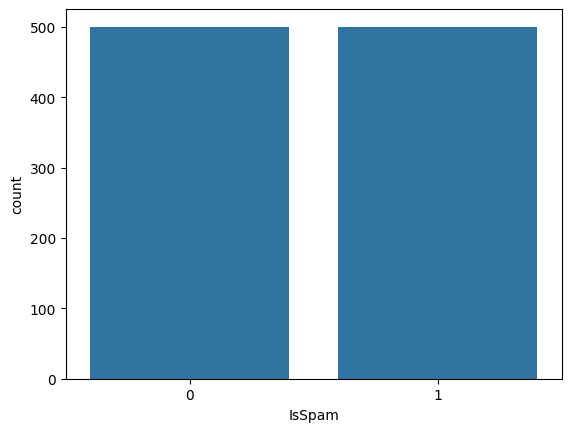

In [ ]:
# check if data is balanced equal for both -- no need for balancing)
sns.countplot(x=df['IsSpam'])
plt.show()

**Data Prepocessing**

In [ ]:
# create preprocess_text function
from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')

def preprocess_text(text):
    # Convert text to lower and tokenize words
    tokens = word_tokenize(text.lower())

    # Remove Puntuation
    no_punc_tokens=[token for token in tokens if token.isalpha()]

    # Remove stop words
    filtered_tokens = [no_punc for no_punc in no_punc_tokens if no_punc not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function to df_train
df['Text'] = df['Text'].apply(preprocess_text)
df

# note 1 is for spam, 0 is for not spam

,IsSpam,Text
0,0,key issue going forwarda year end review repor...
1,0,congrats contratulations execution central mai...
2,0,key issue going forwardall control set work gr...
3,0,epmi file protest entergy transcoattached fili...
4,0,california power please contact kristin walsh ...
...,...,...
995,1,somebody nort offlce pro offlce ado phot shop ...
996,1,utf present day course utf reduce mass product...
997,1,sell regalis affordable pricehi regalis also k...
998,1,email exclusive complimentary satellite dish i...


In [ ]:
# Transfom text using CountVectorizer (Because machine-learning models can't deal with text, we'll use scikit-learn's CountVectorizer class to vectorize the text in the training e-mails.)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['Text'])
X.shape

(1000, 24908)

In [ ]:
Y = df['IsSpam']
Y.shape

(1000,)

In [ ]:
# Split the dataset so that 80% can be used for training and 20% for testing.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**Training of Logistic Regression Model**

In [ ]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)



LogisticRegression()

In [ ]:
# generate predictions using x_test

predictions = lr.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0])

**Evaluation of Logistic Regression Model**

In [ ]:
# confusion matrix

import pandas as pd
from sklearn import metrics

df1 = pd.DataFrame(metrics.confusion_matrix(y_test,predictions))
df1

,0,1
0,91,7
1,2,100


In [ ]:
# Predict probabilities
probs = lr.predict_proba(x_test)

# Print the ROC curve, classification report and confusion matrix
print("Accuracy_Score:",metrics.accuracy_score(y_test, predictions))
print("ROC_AUC_score:",metrics.roc_auc_score(y_test, probs[:,1]))
print(metrics.classification_report(y_test, predictions))


Accuracy_Score: 0.955
ROC_AUC_score: 0.9958983593437375
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        98
           1       0.93      0.98      0.96       102

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



**Training of Multinomial Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

**Evaluation of Multinomial Naive Bayes Model**

In [ ]:

# Evaluate the models using accuracy and F1-score
y_pred_mnb = mnb.predict(x_test)
mnb_probs = mnb.predict_proba(x_test)

accuracy_mnb = metrics.accuracy_score(y_test, y_pred_mnb)

# Print the results
print("ROC_AUC_score:",metrics.roc_auc_score(y_test, mnb_probs[:,1]))
print("Multinomial Naive Bayes - Accuracy:", accuracy_mnb)
print(metrics.classification_report(y_test, y_pred_mnb))

ROC_AUC_score: 0.993797519007603
Multinomial Naive Bayes - Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95       102

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



In [ ]:
df_mnb = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_mnb))

df_mnb

,0,1
0,97,1
1,8,94


**Conclusion**

In conclusion, for this data set, the logistic regression model performed better compared to the multinomial naive bayes model.
Although both models had similar accuracy score of 0.955,the logistic model also had a higher roc auc score of 0.995 compared to 0.993 for the multinomial NB model.
Given that in a spam detection scenario, it is often more critical to catch all spam emails (high recall), logistic model would generally be preferable because it has a significantly higher recall for spam emails (0.98 compared to 0.92). This means it will let fewer spam emails slip through into the user's inbox.







